In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
os.getcwd()

'c:\\Users\\kasul\\OneDrive\\Documents\\Code\\AmazonReviewAnalysiswithMapReduce\\post_processing'

In [5]:

df = pd.read_csv("../output/pos_neg_topwords.csv", index_col=0)

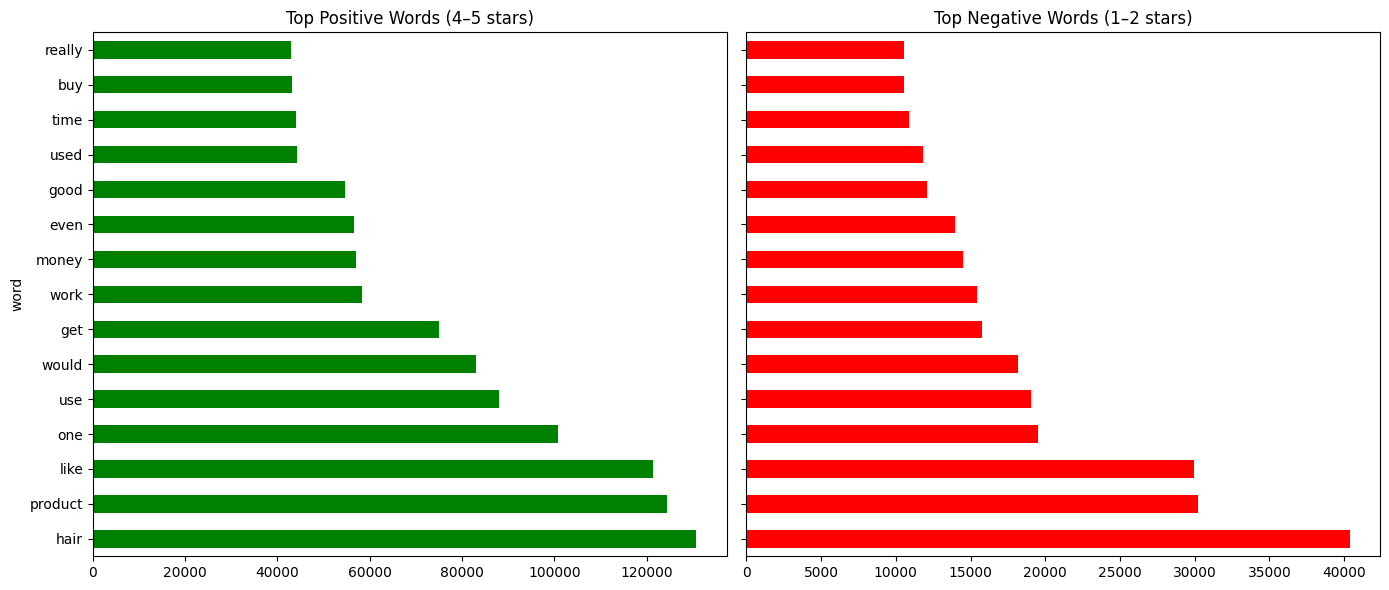

In [11]:
# Top 15 positive words
top_pos = df.sort_values("pos", ascending=False).head(15)
# Top 15 negative words
top_neg = df.sort_values("neg", ascending=False).head(15)

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

top_pos["pos"].plot(kind="barh", ax=ax[0], color="green")
ax[0].set_title("Top Positive Words (4–5 stars)")
ax[0].invert_yaxis()

top_neg["neg"].plot(kind="barh", ax=ax[1], color="red")
ax[1].set_title("Top Negative Words (1–2 stars)")

plt.tight_layout()
plt.savefig("../figs/top_words_pos_neg.png")
plt.show()

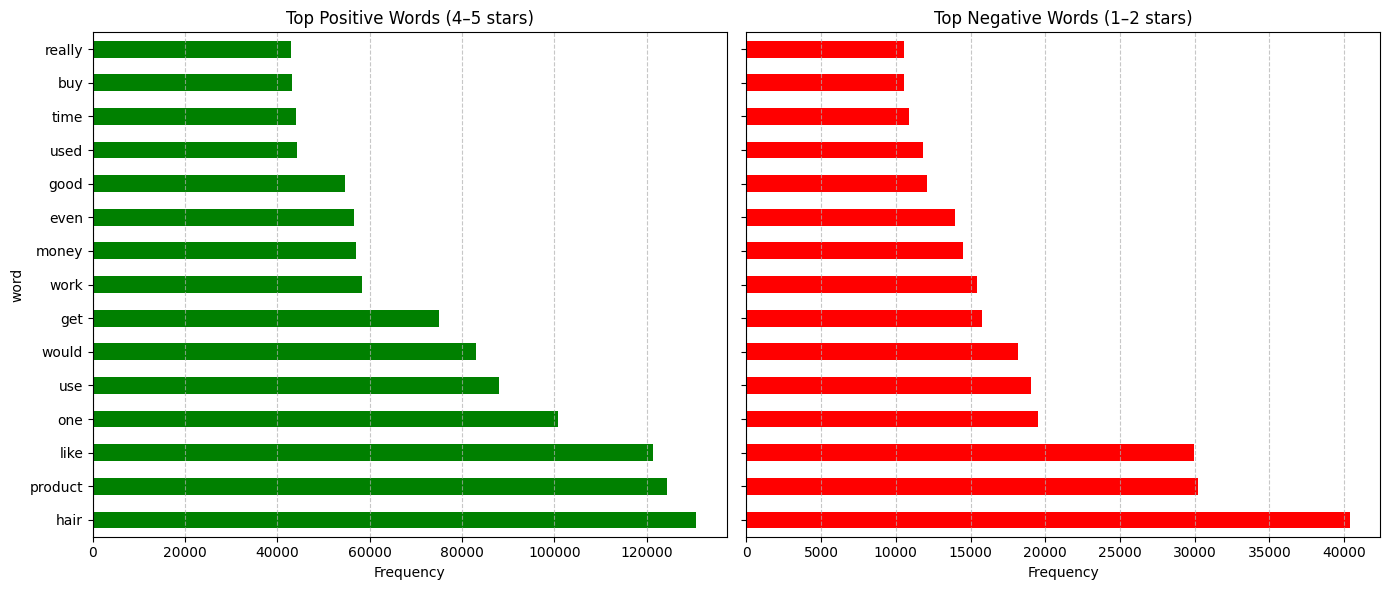

In [13]:
# Top 15 positive words
top_pos = df.sort_values("pos", ascending=False).head(15)
# Top 15 negative words
top_neg = df.sort_values("neg", ascending=False).head(15)

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot positive words
top_pos["pos"].plot(kind="barh", ax=ax[0], color="green")
ax[0].set_title("Top Positive Words (4–5 stars)")
ax[0].set_xlabel("Frequency")
ax[0].invert_yaxis()

# Plot negative words
top_neg["neg"].plot(kind="barh", ax=ax[1], color="red")
ax[1].set_title("Top Negative Words (1–2 stars)")
ax[1].set_xlabel("Frequency")

# Add grid for better readability
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("../figs/top_words_pos_neg.png")
plt.show()

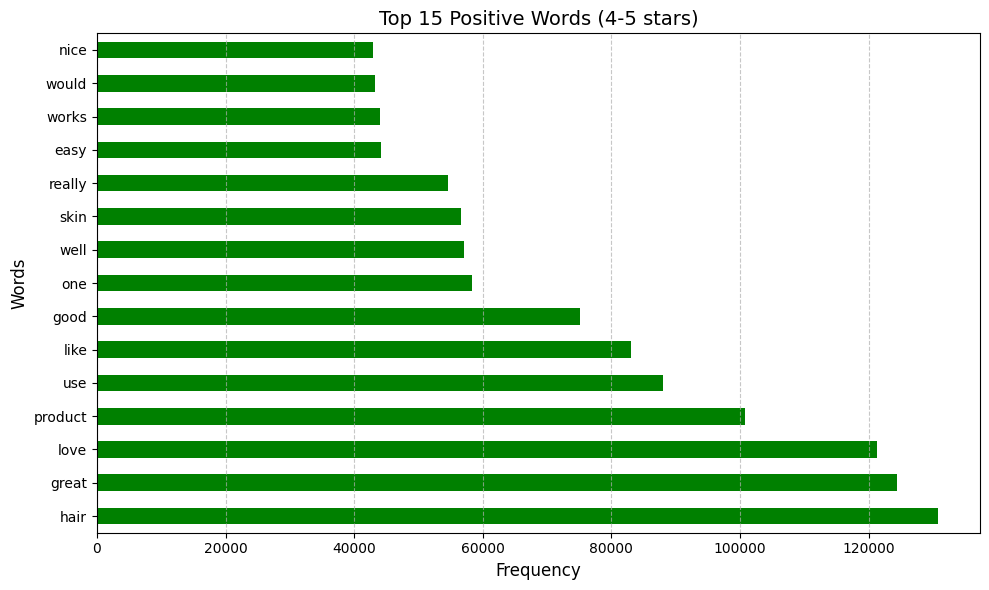

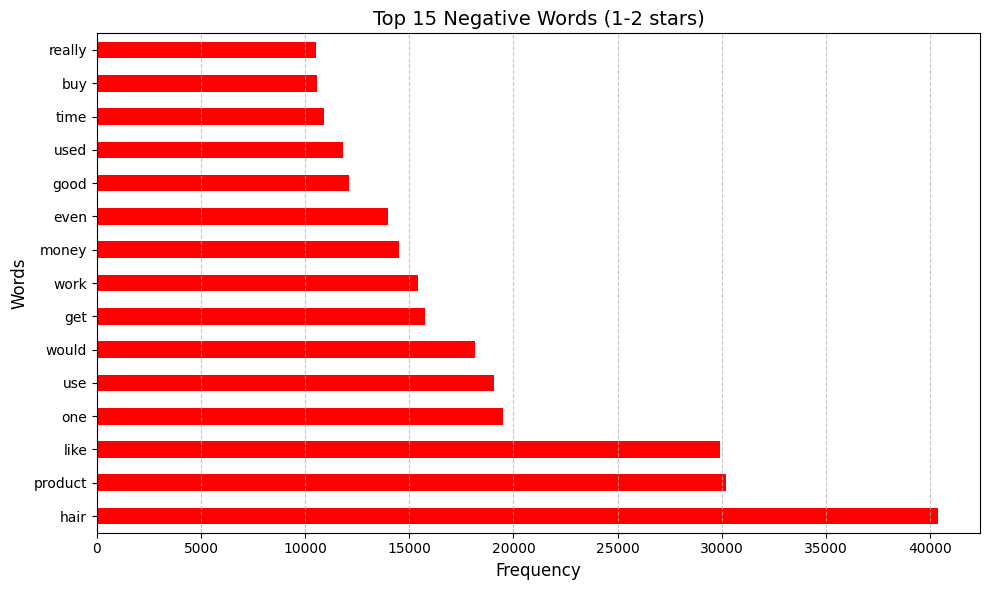

In [14]:
# Create separate graphs for positive and negative words
top_pos = df.sort_values("pos", ascending=False).head(15)
top_neg = df.sort_values("neg", ascending=False).head(15)

# Positive words graph
plt.figure(figsize=(10, 6))
top_pos["pos"].plot(kind="barh", color="green")
plt.title("Top 15 Positive Words (4-5 stars)", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../figs/top_words_positive.png")
plt.show()

# Negative words graph
plt.figure(figsize=(10, 6))
top_neg["neg"].plot(kind="barh", color="red")
plt.title("Top 15 Negative Words (1-2 stars)", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Words", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../figs/top_words_negative.png")
plt.show()

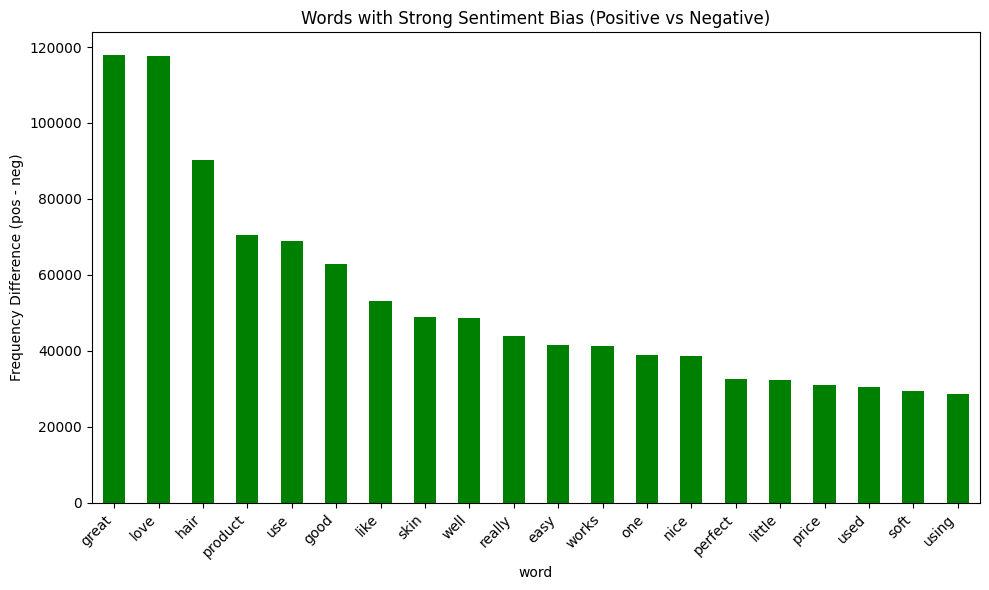

In [8]:
# Get top words with largest positive/negative skew
top_diff = df[df["diff"].abs() > 20].sort_values("diff", ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_diff["diff"].plot(kind="bar", color=top_diff["diff"].apply(lambda x: "green" if x > 0 else "red"))
plt.title("Words with Strong Sentiment Bias (Positive vs Negative)")
plt.ylabel("Frequency Difference (pos - neg)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../figs/word_sentiment_bias.png")
plt.show()


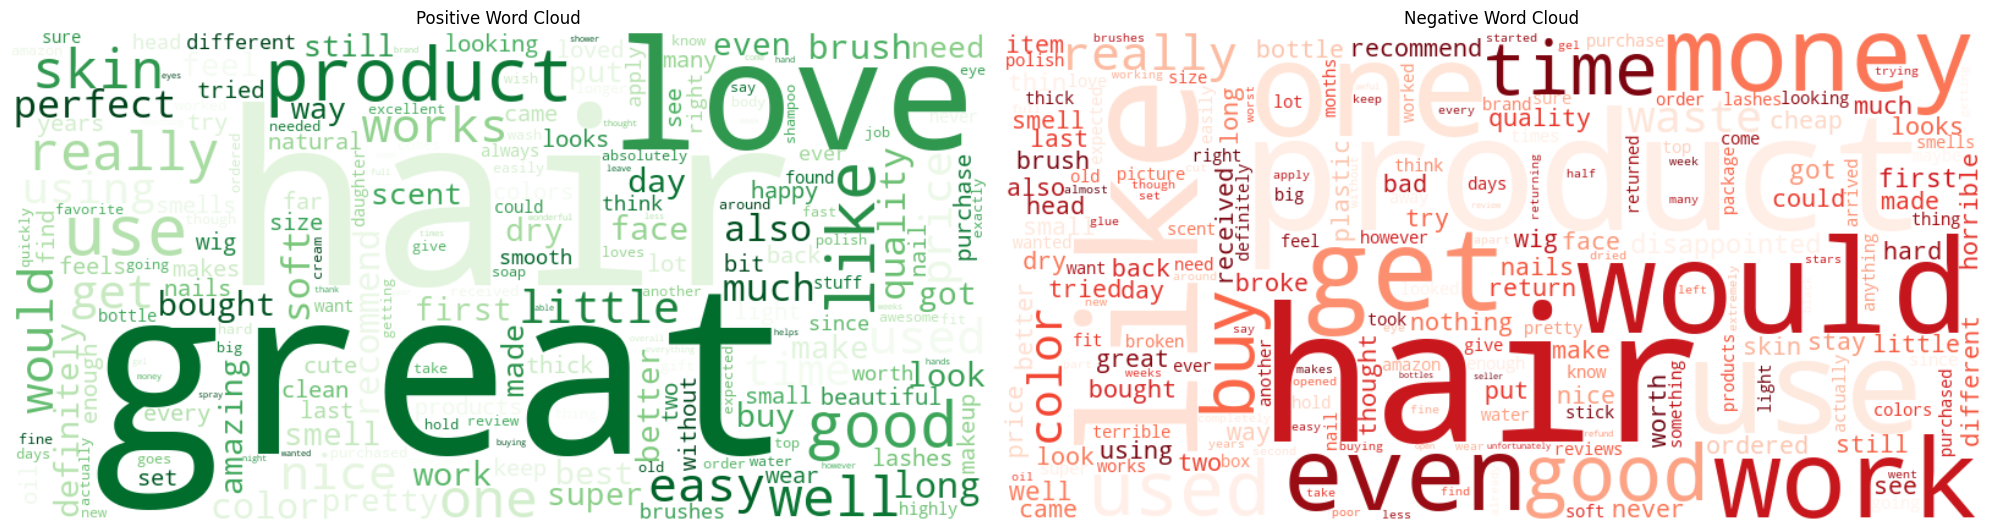

In [16]:
from wordcloud import WordCloud

# Create frequency dicts
pos_freq = df["pos"].to_dict()
neg_freq = df["neg"].to_dict()

# Positive word cloud
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate_from_frequencies(pos_freq)
wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate_from_frequencies(neg_freq)

plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Word Cloud")

plt.tight_layout()
plt.savefig("../figs/wordclouds_pos_neg.png")
plt.show()
